In [1]:
import pandas as pd
import numpy as np

# libraries for building regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the merged data (LALData csv file)
df = pd.read_csv('LALData.csv')

df.head()

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,TEAM_PERF,OPP_PERF,TEAM_WINS
0,11,2022-12-21,22200475,Final,1610612758,1610612747,2022,1610612758,134.0,0.505,...,0.500,0.833,0.458,25.0,39.0,1,0,120.0,134.0,0
1,25,2022-12-19,22200459,Final,1610612756,1610612747,2022,1610612756,130.0,0.495,...,0.448,0.824,0.429,13.0,38.0,1,0,104.0,130.0,0
2,33,2022-12-18,22200451,Final,1610612747,1610612764,2022,1610612747,119.0,0.500,...,0.463,0.792,0.256,24.0,48.0,1,1,119.0,117.0,1
3,50,2022-12-16,22200437,Final,1610612747,1610612743,2022,1610612747,126.0,0.527,...,0.481,0.750,0.333,25.0,39.0,1,1,126.0,108.0,1
4,69,2022-12-13,22200413,Final,1610612747,1610612738,2022,1610612747,118.0,0.473,...,0.442,0.688,0.396,27.0,51.0,0,1,118.0,122.0,0


In [3]:
df.columns

Index(['Unnamed: 0', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT',
       'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'HOME',
       'TEAM_PERF', 'OPP_PERF', 'TEAM_WINS'],
      dtype='object')

In [4]:

cols = ['Unnamed: 0','GAME_ID', 'HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON','GAME_STATUS_TEXT',
        'GAME_DATE_EST','HOME_TEAM_ID', 'VISITOR_TEAM_ID','TEAM_ID_home', 'TEAM_ID_away']

df = df.drop(cols, axis=1)

In [5]:
df.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME,TEAM_PERF,OPP_PERF,TEAM_WINS
0,134.0,0.505,0.750,0.362,29.0,46.0,120.0,0.500,0.833,0.458,25.0,39.0,1,0,120.0,134.0,0
1,130.0,0.495,0.750,0.513,21.0,51.0,104.0,0.448,0.824,0.429,13.0,38.0,1,0,104.0,130.0,0
2,119.0,0.500,0.727,0.407,29.0,43.0,117.0,0.463,0.792,0.256,24.0,48.0,1,1,119.0,117.0,1
3,126.0,0.527,0.750,0.364,29.0,45.0,108.0,0.481,0.750,0.333,25.0,39.0,1,1,126.0,108.0,1
4,118.0,0.473,0.733,0.276,23.0,49.0,122.0,0.442,0.688,0.396,27.0,51.0,0,1,118.0,122.0,0


In [6]:
#CHECK FOR MISSING VALUES
df.isnull().sum()

PTS_home          8
FG_PCT_home       8
FT_PCT_home       8
FG3_PCT_home      8
AST_home          8
REB_home          8
PTS_away          8
FG_PCT_away       8
FT_PCT_away       8
FG3_PCT_away      8
AST_away          8
REB_away          8
HOME_TEAM_WINS    0
HOME              0
TEAM_PERF         7
OPP_PERF          7
TEAM_WINS         0
dtype: int64

In [7]:
#drop the columns with missing values
df.dropna(inplace = True)
df.shape

(1830, 17)

In [8]:
#Declare feature vector and target variable
x = df.drop(['HOME_TEAM_WINS'], axis=1)

y = df['HOME_TEAM_WINS']

In [9]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [10]:
model = LogisticRegression(solver='liblinear', random_state=16)
model.fit(X_train, y_train)

LogisticRegression(random_state=16, solver='liblinear')

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       226

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



Text(0.5, 427.9555555555555, 'Predicted label')

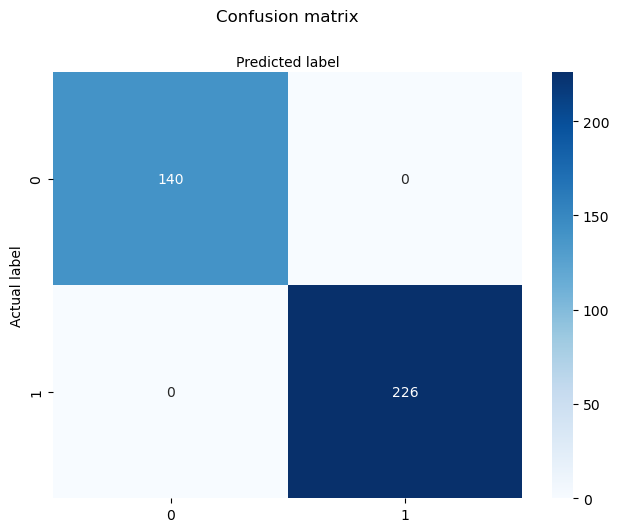

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')